In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

data_dir = '/kaggle/input/aaaaaaaa/dataset/dataset'

# Tạo ImageDataGenerator cho tập huấn luyện và validation
train_val_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.1667,  # 12.5%/75% = 0.1667 để chia validation và train
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Generator cho tập huấn luyện (75%)
train_generator = train_val_datagen.flow_from_directory(
    data_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training'  # 75% dữ liệu cho train
)

# Generator cho tập validation (12.5%)
validation_generator = train_val_datagen.flow_from_directory(
    data_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation'  # 12.5% dữ liệu cho validation
)

# Tạo ImageDataGenerator riêng cho tập test (rescale không cần augmentation)
test_datagen = ImageDataGenerator(rescale=1./255)

# Tạo generator cho tập test từ thư mục 'dataset/test'
test_generator = test_datagen.flow_from_directory(
    '/kaggle/input/aaaaaaaa/test/test',  # Đường dẫn đến thư mục test
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)


Found 1155 images belonging to 3 classes.
Found 229 images belonging to 3 classes.
Found 181 images belonging to 3 classes.


In [7]:
model1 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(3, activation='softmax')  # 3 lớp đầu ra tương ứng với 3 loại biển báo
])

model1.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
# Huấn luyện mô hình
history = model1.fit(
    train_generator,  # Dữ liệu huấn luyện
    epochs=30,  # Số lượng epochs, bạn có thể điều chỉnh
    validation_data=validation_generator,  # Dữ liệu validation
)

Epoch 1/30


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1727711964.221564     176 service.cc:145] XLA service 0x7f16a0006370 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1727711964.221618     176 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0


 1/37 ━━━━━━━━━━━━━━━━━━━━ 4:39 8s/step - accuracy: 0.3750 - loss: 1.0905

I0000 00:00:1727711967.662666     176 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


37/37 ━━━━━━━━━━━━━━━━━━━━ 22s 394ms/step - accuracy: 0.3899 - loss: 1.7399 - val_accuracy: 0.4236 - val_loss: 1.0226
Epoch 2/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 13s 289ms/step - accuracy: 0.5998 - loss: 0.8773 - val_accuracy: 0.7074 - val_loss: 0.7380
Epoch 3/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 12s 278ms/step - accuracy: 0.7268 - loss: 0.6687 - val_accuracy: 0.8384 - val_loss: 0.4745
Epoch 4/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 12s 272ms/step - accuracy: 0.7794 - loss: 0.5524 - val_accuracy: 0.8646 - val_loss: 0.4537
Epoch 5/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 12s 273ms/step - accuracy: 0.7919 - loss: 0.5424 - val_accuracy: 0.7686 - val_loss: 0.7258
Epoch 6/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 12s 283ms/step - accuracy: 0.7802 - loss: 0.6148 - val_accuracy: 0.8341 - val_loss: 0.3996
Epoch 7/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 12s 283ms/step - accuracy: 0.8417 - loss: 0.4434 - val_accuracy: 0.8472 - val_loss: 0.3875
Epoch 8/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 12s 279ms/step - accuracy: 0.8260 - loss: 0.4209 - val_accuracy: 0.886

In [9]:
# Đánh giá mô hình trên tập test
test_loss, test_accuracy = model1.evaluate(
    test_generator,  # Dữ liệu test
)

print(f"Test loss: {test_loss}")
print(f"Test accuracy: {test_accuracy}")

6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 281ms/step - accuracy: 0.9949 - loss: 0.0248
Test loss: 0.021981053054332733
Test accuracy: 0.9944751262664795


In [11]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
# Đọc ảnh
img_path = '/kaggle/input/aaaaaaaa/ktra/ktra/img.jpg'
img = load_img(img_path, target_size=(150, 150))

# Tiền xử lý
x = img_to_array(img)
x = x / 255.0
x = np.expand_dims(x, axis=0)

# Dự đoán
predictions = model1.predict(x)
predicted_class_index = np.argmax(predictions)

# Mapping nhãn
labels = ['cam', 'canhbao', 'chidan']
predicted_label = labels[predicted_class_index]

# In kết quả
print("Nhãn dự đoán của ảnh là:", predicted_label)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step
Nhãn dự đoán của ảnh là: cam


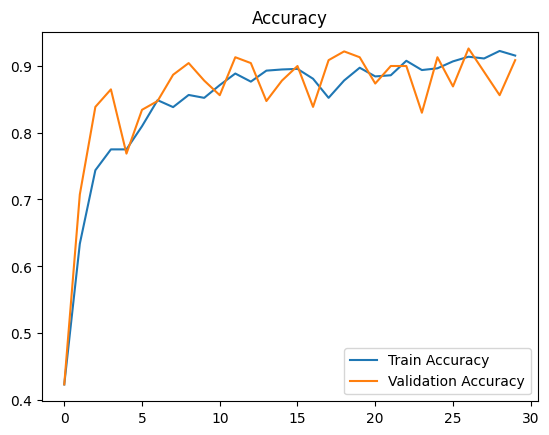

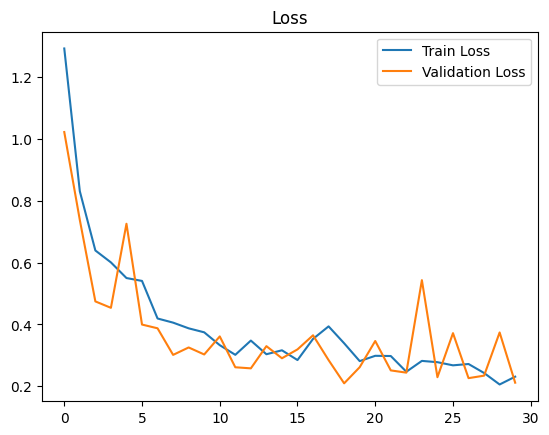

In [12]:
import matplotlib.pyplot as plt

# Vẽ biểu đồ accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()
plt.show()

# Vẽ biểu đồ loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend()
plt.show()


In [89]:
# VGG16 ailab
modelVGG = Sequential([
#     # Block 1
#     Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
#     Conv2D(32, (3, 3), activation='relu',),
#     MaxPooling2D(2, 2),

    # Block 2
    Conv2D(64, (3, 3), activation='relu',input_shape=(150, 150, 3)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    
    # Block 3
    Conv2D(128, (3, 3), activation='relu'),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2,2),
    
     # Block 4
    Conv2D(256, (3, 3), activation='relu'),
    Conv2D(256, (3, 3), activation='relu'),
    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D(2,2),
#     # Block 5
#     Conv2D(256, (3, 3), activation='relu'),
#     Conv2D(256, (3, 3), activation='relu'),
#     Conv2D(256, (3, 3), activation='relu' ),
#     MaxPooling2D(2,2),
    
    # Flatten và Fully Connected
    Flatten(),
    Dense(512, activation='relu'),
    Dense(512, activation='relu'),
    Dense(3, activation='softmax')
])

# Biên dịch mô hình
modelVGG.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])



In [90]:
history = modelVGG.fit(
    train_generator,
    epochs=30,
    validation_data=validation_generator  # Nếu có tập validation
)

Epoch 1/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 19s 351ms/step - accuracy: 0.3444 - loss: 1.2622 - val_accuracy: 0.5284 - val_loss: 1.0485
Epoch 2/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 12s 282ms/step - accuracy: 0.4235 - loss: 1.0322 - val_accuracy: 0.5939 - val_loss: 0.9870
Epoch 3/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 13s 290ms/step - accuracy: 0.6473 - loss: 0.8576 - val_accuracy: 0.5284 - val_loss: 0.9721
Epoch 4/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 13s 285ms/step - accuracy: 0.6322 - loss: 0.7823 - val_accuracy: 0.6943 - val_loss: 0.7311
Epoch 5/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 13s 283ms/step - accuracy: 0.6804 - loss: 0.7554 - val_accuracy: 0.7424 - val_loss: 0.7047
Epoch 6/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 13s 301ms/step - accuracy: 0.6990 - loss: 0.7562 - val_accuracy: 0.6114 - val_loss: 1.0606
Epoch 7/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 13s 290ms/step - accuracy: 0.7087 - loss: 0.7029 - val_accuracy: 0.7555 - val_loss: 0.6048
Epoch 8/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 13s 291ms/step - accuracy: 0.7709 - loss: 0.5635 - val_accu

In [91]:
# Đánh giá mô hình trên tập test
test_loss, test_accuracy = modelVGG.evaluate(
    test_generator,  # Dữ liệu test
)

print(f"Test loss: {test_loss}")
print(f"Test accuracy: {test_accuracy}")

6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 516ms/step - accuracy: 0.9587 - loss: 0.0795
Test loss: 0.07601171731948853
Test accuracy: 0.9613259434700012


In [92]:
predictionsVGG = modelVGG.predict(x)
predicted_class_indexVGG = np.argmax(predictionsVGG)

# Mapping nhãn
labels = ['cam', 'canhbao', 'chidan']
predicted_labelVGG = labels[predicted_class_indexVGG]

# In kết quả
print("Nhãn dự đoán của ảnh là:", predicted_labelVGG)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 702ms/step
Nhãn dự đoán của ảnh là: cam


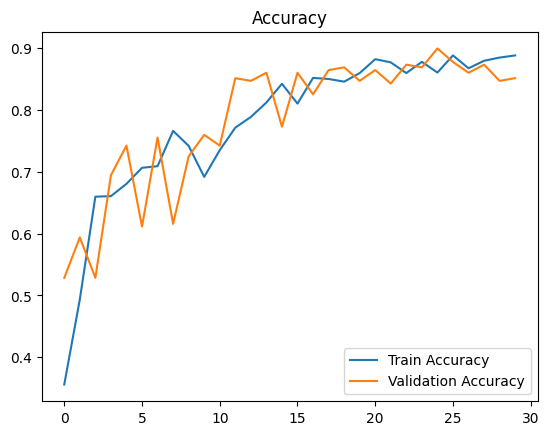

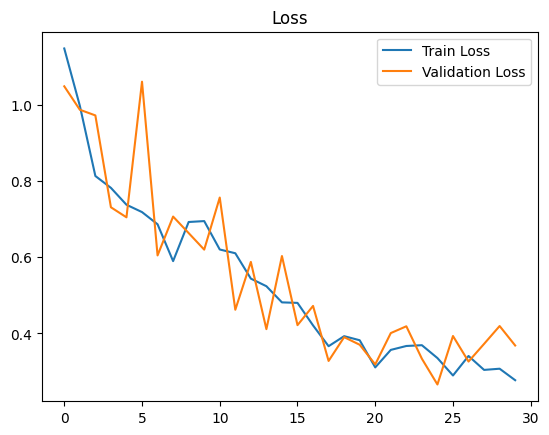

In [93]:
import matplotlib.pyplot as plt

# Vẽ biểu đồ accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()
plt.show()

# Vẽ biểu đồ loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend()
plt.show()

In [5]:
modelAlexNet = Sequential([
    Conv2D(96, (11, 11), strides=(4, 4), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),

    Conv2D(256, (5, 5), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),
    
    Conv2D(384, (3, 3), padding='same', activation='relu'),
    Conv2D(384, (3, 3), padding='same', activation='relu'),
    Conv2D(256, (3, 3), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),
    # Flatten và Fully Connected
    Flatten(),
    Dense(512, activation='relu'),
    Dense(512, activation='relu'),
    Dense(3, activation='softmax')
])

# Biên dịch mô hình
modelAlexNet.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

 

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:

    history = modelAlexNet.fit(
        train_generator,
        epochs=30,
        validation_data=validation_generator  # Nếu có tập validation
    )

Epoch 1/30


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1727871131.093689     277 service.cc:145] XLA service 0x7abf100042f0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1727871131.093739     277 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0


 1/37 ━━━━━━━━━━━━━━━━━━━━ 5:45 10s/step - accuracy: 0.2188 - loss: 1.1107

I0000 00:00:1727871134.448366     277 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


37/37 ━━━━━━━━━━━━━━━━━━━━ 28s 499ms/step - accuracy: 0.3330 - loss: 1.0984 - val_accuracy: 0.3755 - val_loss: 1.0938
Epoch 2/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 11s 238ms/step - accuracy: 0.3997 - loss: 1.0918 - val_accuracy: 0.3843 - val_loss: 1.0848
Epoch 3/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 11s 246ms/step - accuracy: 0.4577 - loss: 1.0750 - val_accuracy: 0.3930 - val_loss: 1.0731
Epoch 4/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 10s 243ms/step - accuracy: 0.4375 - loss: 1.0467 - val_accuracy: 0.3712 - val_loss: 1.0871
Epoch 5/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 10s 235ms/step - accuracy: 0.4887 - loss: 1.0056 - val_accuracy: 0.4541 - val_loss: 1.0336
Epoch 6/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 11s 254ms/step - accuracy: 0.5116 - loss: 0.9671 - val_accuracy: 0.4891 - val_loss: 0.9728
Epoch 7/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 10s 236ms/step - accuracy: 0.5531 - loss: 0.9234 - val_accuracy: 0.5153 - val_loss: 0.9896
Epoch 8/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 11s 241ms/step - accuracy: 0.5705 - loss: 0.8929 - val_accuracy: 0.528

6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 431ms/step - accuracy: 0.9637 - loss: 0.0788
Test loss: 0.07372523844242096
Test accuracy: 0.9668508172035217


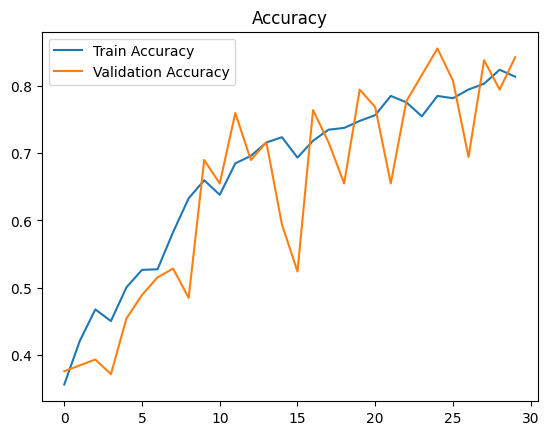

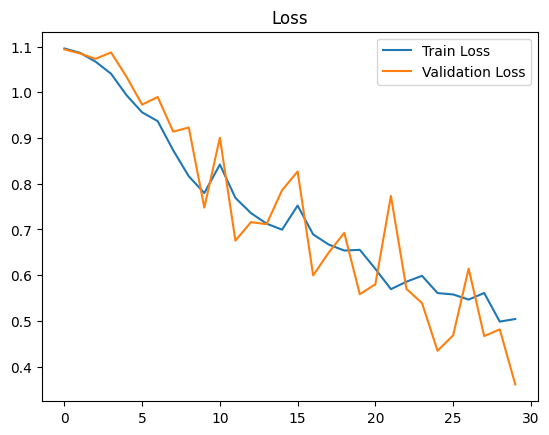

In [7]:
# Đánh giá mô hình trên tập test
test_loss, test_accuracy = modelAlexNet.evaluate(
    test_generator,  # Dữ liệu test
)

print(f"Test loss: {test_loss}")
print(f"Test accuracy: {test_accuracy}")
import matplotlib.pyplot as plt

# Vẽ biểu đồ accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()
plt.show()

# Vẽ biểu đồ loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend()
plt.show()

In [8]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
# Đọc ảnh
img_path = '/kaggle/input/aaaaaaaa/ktra/ktra/img.jpg'
img = load_img(img_path, target_size=(150, 150))

# Tiền xử lý
x = img_to_array(img)
x = x / 255.0
x = np.expand_dims(x, axis=0)

predictionsAlexNet = modelAlexNet.predict(x)
predicted_class_indexAlexNet = np.argmax(predictionsAlexNet)

# Mapping nhãn
labels = ['cam', 'canhbao', 'chidan']
predicted_labelAlexNet = labels[predicted_class_indexAlexNet]

# In kết quả
print("Nhãn dự đoán của ảnh là:", predicted_labelAlexNet)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 643ms/step
Nhãn dự đoán của ảnh là: cam
